In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import joblib

In [17]:
sigmoid = lambda x : 1/(1+np.exp(-x))

In [18]:
def predict(X):
    X = np.array(X)
    X = np.c_[np.ones(len(X)), X]
    return np.argmax(sigmoid(X.dot(W)),axis=1)

In [19]:
W = joblib.load('digits.joblib')

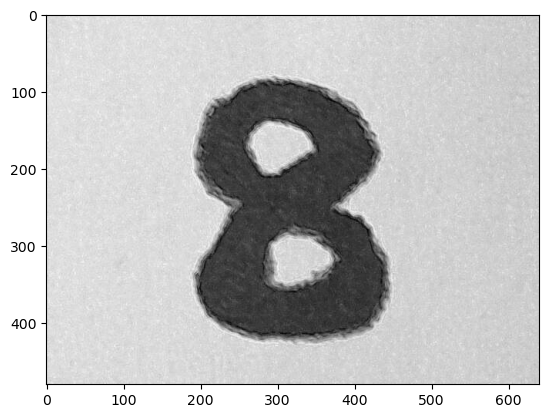

In [26]:
vid = cv2.VideoCapture(1)
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
  
    # Display the resulting frame
    cv2.imshow('Camera', frame)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

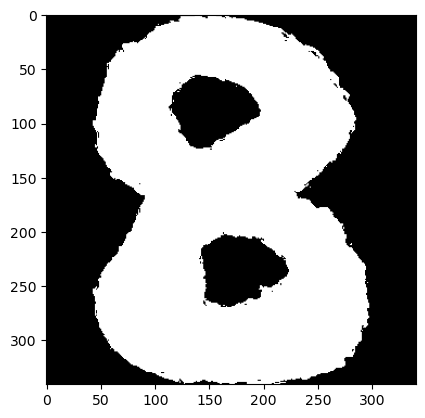

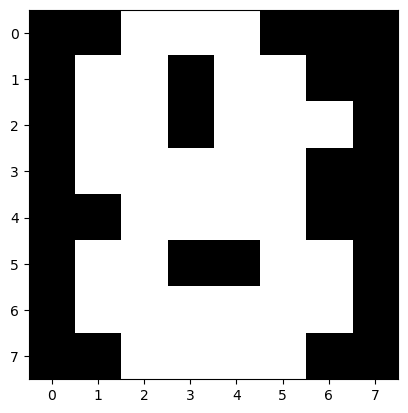

In [27]:
tr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
x,y,w,h = cv2.boundingRect(tr)
if w>h :
    y -= int((w-h)/2)
    h=w
else:
    x -= int((h-w)/2)
    w=h

img = img[y:y+h, x:x+w]
img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(img, cmap='gray')
plt.show()
img = cv2.resize(img,(8,8))
plt.imshow(img, cmap='gray')

In [28]:
print(predict(np.round(img.reshape(1,64)/16.)))


[[8]]
